##Neural Network

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# dataset from Lesson17
df = pd.read_csv('winequality-red.csv')

df.columns = df.columns.str.replace(' ', '_')

In [3]:
df_copy = df.copy()
df.loc[df_copy['quality'] >= 6, 'quality'] = 1    # good wine
df.loc[df_copy['quality'] < 6, 'quality'] = 0     # bad wine

In [4]:
df['quality'].value_counts()

quality
1    855
0    744
Name: count, dtype: int64

In [5]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [6]:
X = df.iloc[:, :11]
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=15)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# выходной слой = 1 => activation='sigmoid' => loss='binary_crossentropy'
input_shape = (X_train.shape[1],)

model = keras.Sequential([
    keras.layers.Dense(12, input_shape=input_shape),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
40/40 [==============================] - 3s 16ms/step - loss: 0.9821 - accuracy: 0.3096 - val_loss: 0.8761 - val_accuracy: 0.2906
Epoch 2/15
40/40 [==============================] - 0s 4ms/step - loss: 0.7965 - accuracy: 0.3933 - val_loss: 0.7326 - val_accuracy: 0.4750
Epoch 3/15
40/40 [==============================] - 0s 4ms/step - loss: 0.6807 - accuracy: 0.5434 - val_loss: 0.6470 - val_accuracy: 0.5969
Epoch 4/15
40/40 [==============================] - 0s 4ms/step - loss: 0.6113 - accuracy: 0.6575 - val_loss: 0.6025 - val_accuracy: 0.6875
Epoch 5/15
40/40 [==============================] - 0s 5ms/step - loss: 0.5725 - accuracy: 0.7060 - val_loss: 0.5789 - val_accuracy: 0.6906
Epoch 6/15
40/40 [==============================] - 0s 3ms/step - loss: 0.5516 - accuracy: 0.7154 - val_loss: 0.5671 - val_accuracy: 0.7063
Epoch 7/15
40/40 [==============================] - 0s 3ms/step - loss: 0.5384 - accuracy: 0.7256 - val_loss: 0.5590 - val_accuracy: 0.7312
Epoch 8/15
40/40 [=

In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

10/10 [==============================] - 0s 2ms/step - loss: 0.5484 - accuracy: 0.7375
Test accuracy: 0.737500011920929
Test loss: 0.5484082102775574


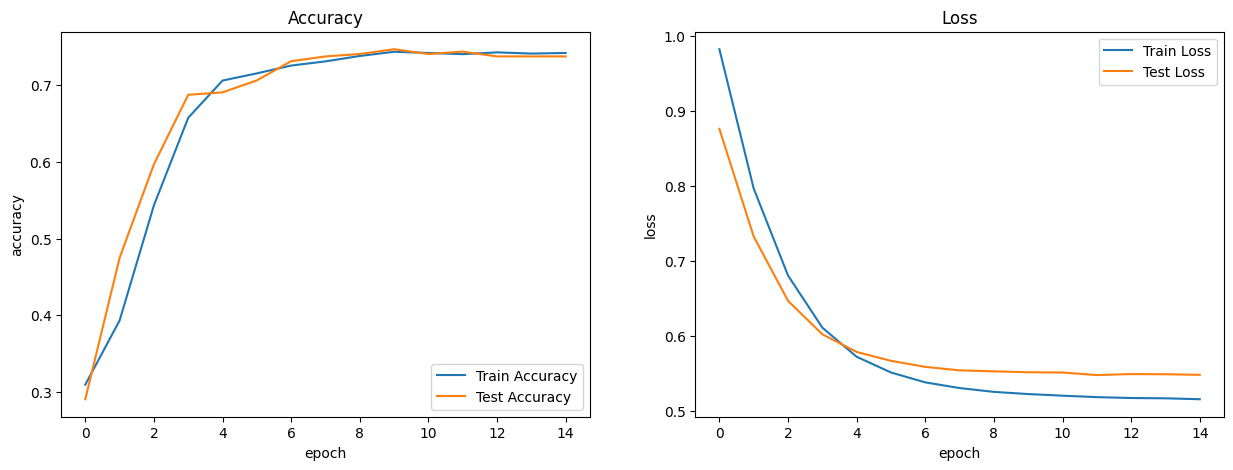

In [9]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.show()

In [10]:
# выходной слой = 2 => activation='softmax' => loss='sparse_categorical_crossentropy'
input_shape = (X_train.shape[1],)

model = keras.Sequential([
    keras.layers.Dense(12, input_shape=input_shape),
    keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
40/40 [==============================] - 1s 6ms/step - loss: 0.7736 - accuracy: 0.4519 - val_loss: 0.7120 - val_accuracy: 0.5219
Epoch 2/15
40/40 [==============================] - 0s 3ms/step - loss: 0.6424 - accuracy: 0.6286 - val_loss: 0.6161 - val_accuracy: 0.6750
Epoch 3/15
40/40 [==============================] - 0s 3ms/step - loss: 0.5797 - accuracy: 0.6982 - val_loss: 0.5793 - val_accuracy: 0.7188
Epoch 4/15
40/40 [==============================] - 0s 2ms/step - loss: 0.5511 - accuracy: 0.7091 - val_loss: 0.5614 - val_accuracy: 0.7281
Epoch 5/15
40/40 [==============================] - 0s 3ms/step - loss: 0.5371 - accuracy: 0.7248 - val_loss: 0.5533 - val_accuracy: 0.7312
Epoch 6/15
40/40 [==============================] - 0s 3ms/step - loss: 0.5289 - accuracy: 0.7349 - val_loss: 0.5493 - val_accuracy: 0.7406
Epoch 7/15
40/40 [==============================] - 0s 3ms/step - loss: 0.5238 - accuracy: 0.7420 - val_loss: 0.5497 - val_accuracy: 0.7469
Epoch 8/15
40/40 [==

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

10/10 [==============================] - 0s 2ms/step - loss: 0.5484 - accuracy: 0.7375
Test accuracy: 0.737500011920929
Test loss: 0.5484040975570679


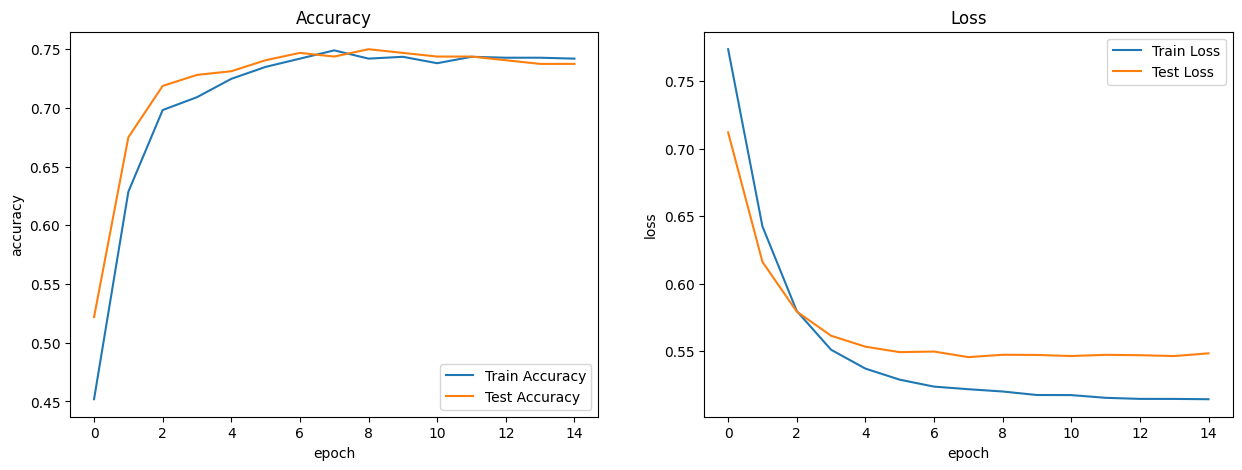

In [12]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.show()

# MNIST

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
class_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

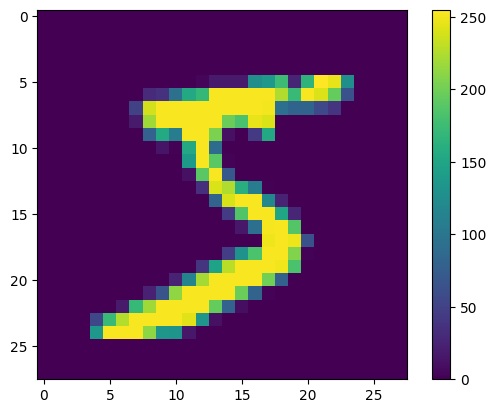

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

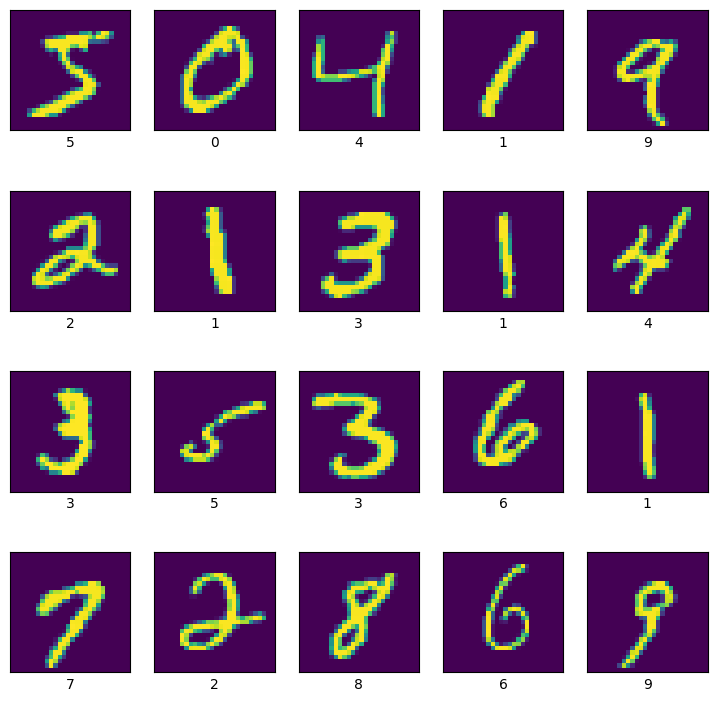

In [6]:
plt.figure(figsize=(9,9))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_labels[train_labels[i]])

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2571 - accuracy: 0.9266 - val_loss: 0.1354 - val_accuracy: 0.9606
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1142 - accuracy: 0.9663 - val_loss: 0.1101 - val_accuracy: 0.9662
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0785 - accuracy: 0.9763 - val_loss: 0.0981 - val_accuracy: 0.9701
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0587 - accuracy: 0.9818 - val_loss: 0.0790 - val_accuracy: 0.9746
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0459 - accuracy: 0.9858 - val_loss: 0.0772 - val_accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0361 - accuracy: 0.9890 - val_loss: 0.0748 - val_accuracy: 0.9769
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0290 - accuracy: 0.9907 - val_loss: 0.0752 - val_accurac

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0821 - accuracy: 0.9776
Test accuracy: 0.9775999784469604
Test loss: 0.08205820620059967


In [11]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


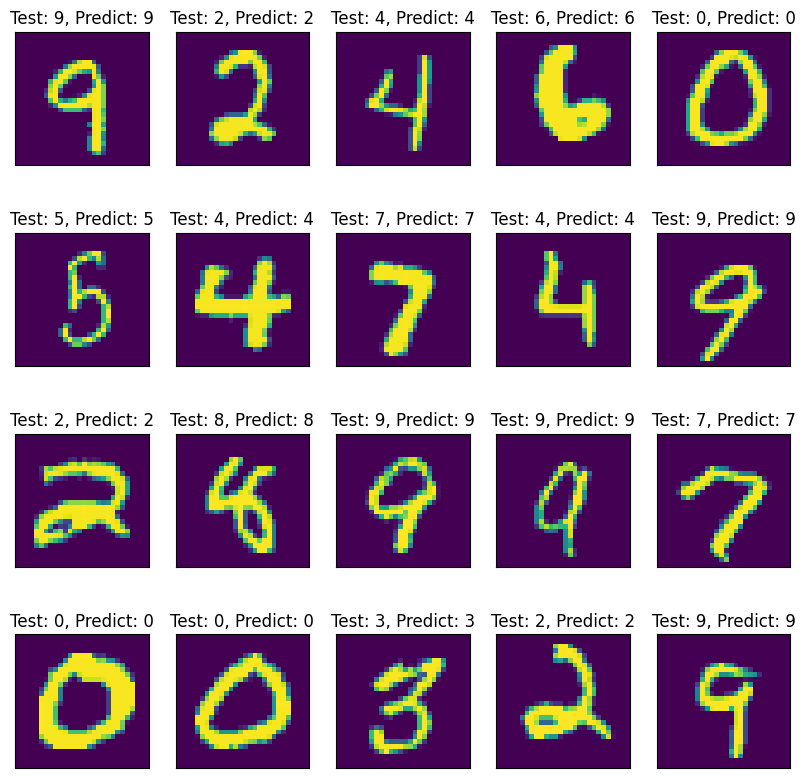

In [12]:
import random

plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  idx = random.randint(0, len(test_labels))
  predict = np.argmax(predictions[idx])
  test = test_labels[idx]
  plt.imshow(test_images[idx])
  plt.title(f'Test: {test}, Predict: {predict}')
plt.show()

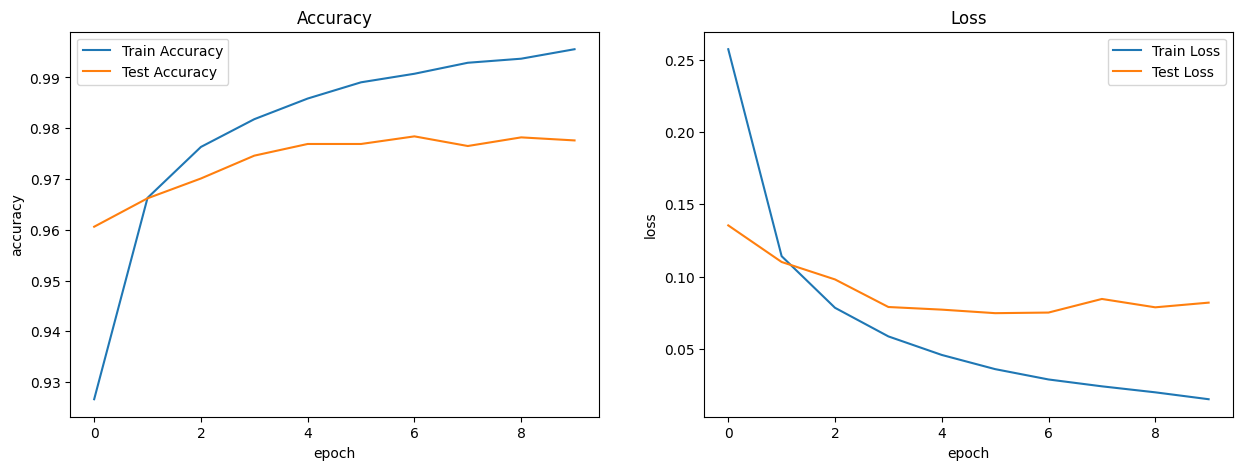

In [14]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.show()